# Análise da Base de Dados de Astronautas da NASA

Análise do arquivo de dados CSV disponível em https://www.kaggle.com/nasa/astronaut-yearbook pela NASA. Este arquivo contém dados sobre todos os astronautas que participaram na NASA entre 1959 até o presente.

![Imagem do Astronauta](https://wi-images.condecdn.net/image/Kd0QVoZq67D/crop/3240/f/gettyimages-548979711.jpg)

## Carregamento e Análise Inicial dos Dados

In [1]:
# Importando bibliotecas

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Local dos arquivos

INPUT = '../input'
import os
print(os.listdir(INPUT))

['astronauts.csv']


In [3]:
# Carga dos dados
astronautas = pd.read_csv(INPUT+'/astronauts.csv')

In [70]:
# Análise inicial da base
print('Forma da tabela:', astronautas.shape)
print('Estrutura do dataframe:')
print(astronautas.info())

Forma da tabela: (357, 23)
Estrutura do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 23 columns):
Name                   357 non-null object
Year                   330 non-null float64
Group                  330 non-null float64
Status                 357 non-null object
Birth Date             357 non-null datetime64[ns]
Birth Place            357 non-null object
Gender                 357 non-null object
Alma Mater             356 non-null object
Undergraduate Major    335 non-null object
Graduate Major         298 non-null object
Military Rank          207 non-null object
Military Branch        211 non-null object
Space Flights          357 non-null int64
Space Flight (hr)      357 non-null int64
Space Walks            357 non-null int64
Space Walks (hr)       357 non-null float64
Missions               334 non-null object
Death Date             52 non-null datetime64[ns]
Death Mission          16 non-null object
x            

In [29]:
# correção das datas
astronautas['Birth Date'] = pd.to_datetime(astronautas['Birth Date'])
astronautas['Death Date'] = pd.to_datetime(astronautas['Death Date'])

In [5]:
# Verificação dos dados
astronautas.sample(5)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
88,Nancy J. Currie,1990.0,13.0,Management,12/29/1958,"Wilmington, DE",Female,Ohio State University; University of Southern ...,Biological Science,Safety Engineering; Industrial Engineering,Colonel,US Army (Retired),4,999,0,0.0,"STS-57 (Endeavor), STS-70 (Discovery), STS-88 ...",NaN,NaN
273,Richard N. Richards,1980.0,9.0,Retired,8/24/1946,"Key West, FL",Male,University of Missouri; University of West Flo...,Chemical Engineering,Aeronautical Systems,Captain,US Navy (Retired),4,813,0,0.0,"STS-28 (Columbia), STS-41 (Discovery), STS-50 ...",NaN,NaN
167,Scott J. Horowitz,1992.0,14.0,Retired,3/24/1957,"Philadelphia, PA",Male,California State University-Northridge; Georgi...,Engineering,Aerospace Engineering,Colonel,US Air Force (Retired),4,1137,0,0.0,"STS-75 (Columbia), STS-82 (Discovery), STS-101...",NaN,NaN
287,Francis R. Scobee,1978.0,8.0,Deceased,5/19/1939,"Cle Elum, WA",Male,University of Arizona,Aerospace Engineering,NaN,Major,US Air Force (Retired),2,167,0,0.0,"STS 41-C (Challenger), STS 51-L (Challenger)",1/28/1986,STS 51-L (Challenger)
288,David R. Scott,1963.0,3.0,Retired,6/6/1932,"San Antonio, TX",Male,US Military Academy; MIT,NaN,Aeronautics & Astronautics,Colonel,US Air Force (Retired),3,546,4,19.0,"Gemini 8, Apollo 9, Apollo 15",NaN,NaN


# Análise dos Dados

## Dicionário de Dados

Dicionário de dados composto após as verificações dos dados, tipos e caracteristicas.

Variáveis: 

* Name: string
* Year: int
* Group: int
* Satus: string (Active, Retired, Management, Deceased)
* Birth Date: date
* Birth Place: string
* Gender: string (Male, Female)
* Alma Mater: string -> universidade
* Undergraduate Major: string -> gradução
* Graduate Major: string -> gradução/especialização
* Military Rank: string -> patente militar
* Military Branch: string -> tipo de milico
* Space Flights: int -> qtd de voos
* Space Flight (hr): int -> qtd de horas "voando"
* Space Walks: int -> qtd de caminhadas 
* Space Walks (hr) -> qtd de horas caminhadas
* Missions: string, nome das missões, separadas pro virgula
* Death Date: date
* Death Mission: str

Alguns dos valores inteiros estão como float pois possuem NaN em alguns registros e o pandas somente suporta Float com NaN, até o momento.

In [6]:
# Dados das variáveis numéricas
astronautas.describe()

# Verifica-se que existem diversos NaN devido a diferença na contagem das variáveis

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


In [7]:
# Análise das categóricas
astronautas['Military Branch'].value_counts()


US Air Force (Retired)             61
US Navy (Retired)                  59
US Navy                            21
US Air Force                       21
US Marine Corps (Retired)          17
US Army (Retired)                  13
US Army                             4
US Air Force Reserves (Retired)     3
US Marine Corps                     3
US Marine Corps Reserves            2
US Naval Reserves                   2
US Air Force Reserves               2
US Coast Guard (Retired)            2
US Naval Reserves (Retired)         1
Name: Military Branch, dtype: int64

In [69]:
# Removido o tipo (Retired) e reagrupado.
astronautas['tipo_milico'] = astronautas['Military Branch'].str.replace(' \(Retired\)', '')
astronautas['tipo_milico'].value_counts()

US Air Force                82
US Navy                     80
US Marine Corps             20
US Army                     17
US Air Force Reserves        5
US Naval Reserves            3
US Marine Corps Reserves     2
US Coast Guard               2
Name: tipo_milico, dtype: int64

In [8]:
# Rank Militar
astronautas['Military Rank'].value_counts()

Colonel                  94
Captain                  68
Commander                13
Lieutenant Colonel       10
Major                     5
Major General             4
Brigadier General         4
Lieutenant Commander      3
Rear Admiral              2
Lieutenant General        2
Vice Admiral              1
Chief Warrant Officer     1
Name: Military Rank, dtype: int64

In [65]:
# Generos
astronautas['Gender'].value_counts(normalize=True) * 100

# 86% dos astronautas são homens

Male      85.994398
Female    14.005602
Name: Gender, dtype: float64

In [10]:
# Top 10 formações
astronautas['Undergraduate Major'].value_counts().head(10)

# Existem astronautas com mais de uma formação

Physics                     35
Aerospace Engineering       33
Mechanical Engineering      30
Aeronautical Engineering    28
Electrical Engineering      23
Engineering Science         13
Engineering                 12
Mathematics                 11
Chemistry                   10
Naval Sciences               9
Name: Undergraduate Major, dtype: int64

In [11]:
# Top 10 Universidades
astronautas['Alma Mater'].value_counts().head(10)

## Diversos astronautas tem mais de uma universidade de formação

US Naval Academy                                        12
US Naval Academy; US Naval Postgraduate School          11
US Air Force Academy; Purdue University                  7
Purdue University                                        7
MIT                                                      5
US Naval Academy; MIT                                    5
Stanford University                                      4
University of Colorado                                   4
US Military Academy; Georgia Institute of Technology     4
US Air Force Academy                                     3
Name: Alma Mater, dtype: int64

In [12]:
# Verificando que astronautas não tem ano preenchido
astronautas[astronautas.Year.isnull()].head(10)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
23,John-David F. Bartoe,NaN,NaN,Retired,11/17/1944,"Abington, PA",Male,Lehigh University; Georgetown University,Physics,Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
45,Jay Clark Buckey,NaN,NaN,Retired,6/6/1956,"New York, NY",Male,Cornell University,Electrical Engineering,Medicine,NaN,NaN,1,381,0,0.0,STS-90 (Columbia),NaN,NaN
61,Robert Cenker,NaN,NaN,Retired,11/5/1948,"Uniontown, PA",Male,Pennsylvania State University; Rutgers University,Aerospace Engineering,Aerospace Engineering; Electrical Engineering,NaN,NaN,1,146,0,0.0,STS 61-C (Columbia),NaN,NaN
84,Roger K. Crouch,NaN,NaN,Retired,9/12/1940,"Jamestown, TN",Male,Tennessee Polytechnic Institute; Virginia Poly...,Physics,Physics,NaN,NaN,1,471,0,0.0,"STS-83 (Columbia), STS-94 (Columbia)",NaN,NaN
90,Lawrence J. Delucas,NaN,NaN,Retired,7/11/1950,"Syracuse, NY",Male,University of Alabama at Birmingham,Chemistry; Physiological Optics,Chemistry; Biochemistry; Optometry,NaN,NaN,1,331,0,0.0,STS-50 (Columbia),NaN,NaN
95,Samuel T. Durrance,NaN,NaN,Retired,9/17/1943,"Tallahassee, FL",Male,California State University; University of Col...,Physics,Physics; Astrogeophysics,NaN,NaN,2,614,0,0.0,"STS-35 (Columbia), STS-67 (Endeavor)",NaN,NaN
105,Martin J. Fettman,NaN,NaN,Retired,12/31/1956,"Brooklyn, NY",Male,Cornell University; Colorado State University,Animal Nutrition,Physiology,NaN,NaN,1,336,0,0.0,STS-58 (Columbia),NaN,NaN
119,F. Andrew Gaffney,NaN,NaN,Retired,6/9/1946,"Carlsbad, NM",Male,University of California-Berkeley; University ...,Psychology,Medicine,NaN,NaN,1,218,0,0.0,STS-40 (Columbia),NaN,NaN
123,Jake Garn,NaN,NaN,Retired,10/12/1932,Richfield. UT,Male,University of Utah,Business Finance,NaN,NaN,NaN,1,167,0,0.0,STS 51-D (Discovery),NaN,NaN


# Análise Gráfica

Análise dos dados graficamente, utilizando-se histogramas e boxplot.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


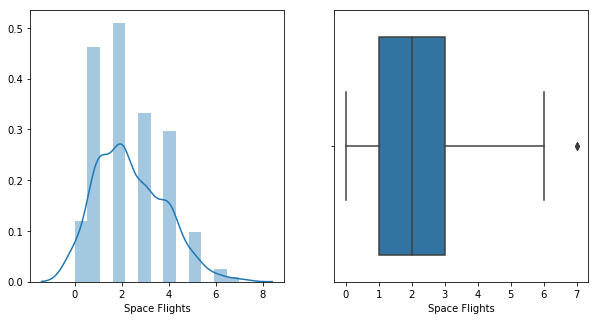

In [13]:
# Verificando a distribuição das variáveis
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

## Quantidades de voos
sns.distplot(astronautas['Space Flights'], ax=axs[0])
sns.boxplot(astronautas['Space Flights'], ax=axs[1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


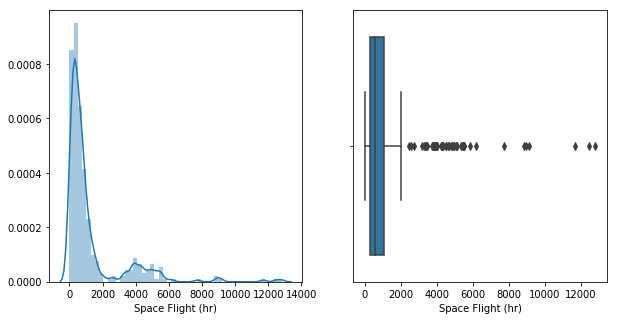

In [14]:
## Horas de voos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(astronautas['Space Flight (hr)'], ax=axs[0])
sns.boxplot(astronautas['Space Flight (hr)'], ax=axs[1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


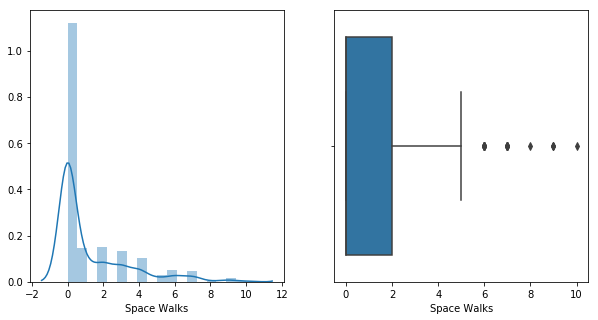

In [15]:
## Camihadas Espaciais
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(astronautas['Space Walks'], ax=axs[0])
sns.boxplot(astronautas['Space Walks'], ax=axs[1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


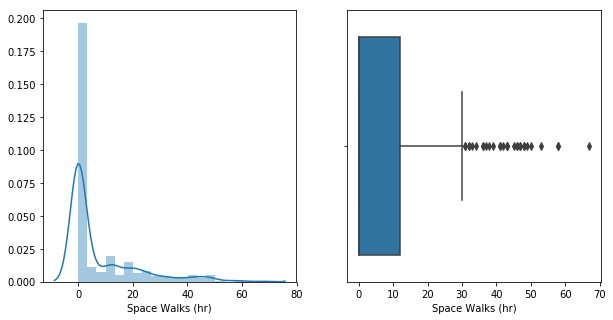

In [16]:
## Camihadas Espaciais Horas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(astronautas['Space Walks (hr)'], ax=axs[0])
sns.boxplot(astronautas['Space Walks (hr)'], ax=axs[1])

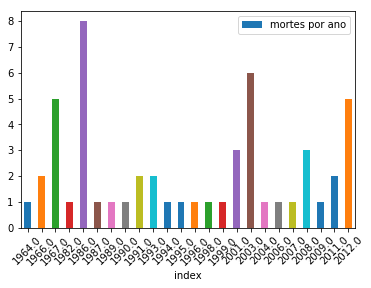

In [59]:
# mortes por ano
astronautas['ano_morte'] = astronautas['Death Date'].dt.year
astronautas['ano_morte'].value_counts().to_frame().reset_index().sort_values('index').plot.bar(y='ano_morte', 
                                                                                               x='index', label='mortes por ano', rot=45)

# O ano com mais mortes é 1986

# Consultas

In [17]:
## Quais os 5 astronautas com mais horas de voos?
astronautas[['Name', 'Space Flight (hr)', 'Space Flights']].sort_values('Space Flight (hr)', ascending=False).head()

,Name,Space Flight (hr),Space Flights
346,Jeffrey N. Williams,12818,4
183,Scott J. Kelly,12490,4
342,Peggy A. Whitson,11698,3
107,E. Michael Fincke,9159,3
111,C. Michael Foale,8970,6


In [18]:
## E os 5 astronautas com mais caminhadas de voos?
astronautas[['Name', 'Space Walks (hr)', 'Space Walks']].sort_values('Space Walks (hr)', ascending=False).head()

,Name,Space Walks (hr),Space Walks
203,Michael E. Lopez-Alegria,67.0,10
141,John M. Grunsfeld,58.0,8
279,Jerry L. Ross,58.0,9
215,Richard A. Mastracchio,53.0,9
347,Sunita L. Williams,50.0,7


In [19]:
## Missões que falharam (morreram astronautas)
astronautas[astronautas['Death Mission'].notnull()]['Death Mission'].unique()

array(['STS-107 (Columbia)', 'Apollo 1', 'STS 51-L (Challenger)'],
      dtype=object)

In [20]:
# Média das missões por genero
astronautas[['Gender', 'Space Flights']].groupby('Gender').mean()

,Space Flights
Gender,
Female,2.400000
Male,2.358306


In [21]:
# Média das missões por status
astronautas[['Status', 'Space Flights']].groupby('Status').mean()

,Space Flights
Status,
Active,2.020000
Deceased,1.450980
Management,2.694444
Retired,2.600000


In [22]:
# Verificando se Mission e Space Flights são em mesma quantidade
astronautas['x'] = astronautas['Missions'].str.split(',')  # Missoes são separadas por virgula
astronautas['qtd_missoes'] = astronautas[astronautas['x'].notnull()]['x'].apply(lambda x: len(x))  # Conta tamanho da lista
# astronautas.sort_values('qtd_missoes', ascending=False).head()
astronautas[(astronautas['Space Flights']!=astronautas['qtd_missoes'])&(astronautas['qtd_missoes'].notnull())]

# Existem quatro linhas em que Space Flights difere de quantidade missões

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,x,qtd_missoes
84,Roger K. Crouch,NaN,NaN,Retired,9/12/1940,"Jamestown, TN",Male,Tennessee Polytechnic Institute; Virginia Poly...,Physics,Physics,NaN,NaN,1,471,0,0.0,"STS-83 (Columbia), STS-94 (Columbia)",NaN,NaN,"[STS-83 (Columbia), STS-94 (Columbia)]",2.0
140,Virgil I. Grissom,1959.0,1.0,Deceased,4/3/1926,"Mitchell, IN",Male,Purdue University,Mechanical Engineering,NaN,Lieutenant Colonel,US Air Force,2,5,0,0.0,"Mercury 4, Gemini 3, Apollo 1",1/27/1967,Apollo 1,"[Mercury 4, Gemini 3, Apollo 1]",3.0
186,Robert Shane Kimbrough,2004.0,19.0,Active,6/4/1967,"Killeen, TX",Male,US Military Academy; Georgia Institute of Tech...,Aerospace Engineering,Operations Research,Colonel,US Army,3,3720,4,25.0,"STS-126 (Endeavor), ISS-49/50 (Soyuz)",NaN,NaN,"[STS-126 (Endeavor), ISS-49/50 (Soyuz)]",2.0
203,Michael E. Lopez-Alegria,1992.0,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",NaN,NaN,"[STS-73 (Columbia), STS-92 (Discovery), STS-...",4.0


In [62]:
# Vendo se o povo aposentado tem mais horas de espaço que a ativa
astronautas[['Status', 'Space Flight (hr)']].groupby('Status').sum()

,Space Flight (hr)
Status,
Active,181997
Deceased,13775
Management,40624
Retired,209592
